<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/mean_median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter dataset file path: Iris.csv
Columns in dataset: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
Enter numerical column for analysis: Id

Statistics for Id:
Mean: 75.5
Median: 75.5
Mode: 1
Standard Deviation: 43.445367992456916
Variance: 1887.5
Range: 149

Outliers: []



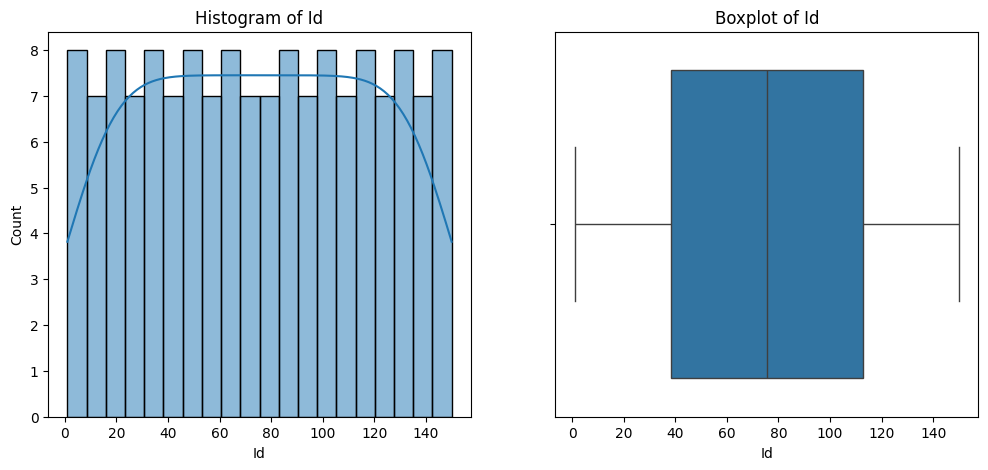

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

# Compute statistics for a numerical column
def numerical_stats(df, column):
    data = df[column].dropna()
    mean = np.mean(data)
    median = np.median(data)
    mode = data.mode()[0] if not data.mode().empty else None
    std_dev = np.std(data, ddof=1)
    variance = np.var(data, ddof=1)
    data_range = np.max(data) - np.min(data)

    print(f"\nStatistics for {column}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")
    print(f"Range: {data_range}\n")

    return data

# Identify outliers using IQR
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    print(f"Outliers: {outliers.tolist()}\n")

# Generate histogram and boxplot
def plot_numerical_distribution(data, column):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=20, kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data)
    plt.title(f'Boxplot of {column}')

    plt.show()

# Main function
def main():
    file_path = input("Enter dataset file path: ")
    df = load_dataset(file_path)

    print("Columns in dataset:", df.columns.tolist())

    num_col = input("Enter numerical column for analysis: ")
    num_data = numerical_stats(df, num_col)
    detect_outliers(num_data)
    plot_numerical_distribution(num_data, num_col)

if __name__ == "__main__":
    main()
